# Study on Real Estate Ads Price

Buying your own house is one of the most responsible investments in the life of almost evetyone of us. The cost per square meter, especially in big cities, is high compared to the average income level, for this reason, the correct calculation of the market value of real estate is important for both the seller and the buyer. At the same time, such cost within one locality can vary significantly: it is influenced by a number of factors.
When there is a wide offer, it might be necessary to automatize the calculation of the real estate market value. To build up a calculation model, it is necessary to determine which parameters have the greatest impact on the price.
The latter will be the aim of our study.

**The purpose of this study** is to test the following hypotheses:
1. Area affects the price on real estate.
2. The number of rooms affects the price on real estate.
3. The floor category affects the the price on real estate.
4. The date of ad placement affects the price on real estate.
5. The distance from the center affects the price on real estate.

**Research progress**:

We will try to test the above hypotheses on the basis of real estate advertisements in St. Petersburg and neighboring settlements for several years, retrieved from the Yandex Real Estate service.
Since we do not have information about the format (excepting the column names) and the quality of the data, before testing the hypotheses, we will overview the data and pre-process it, as well as do a data discovery: this is necessary to eliminate errors that may affect the conclusions.


Thus, this study will include the following steps:

* data overview 
* data preprocessing
* data discovery
* testing hypotheses


## Data Overview

Let's make the first idea about the data. To view and analyze, we import the standard pandas library, with which we read the file in csv format, save it to variable as a dataframe as well as also view the first 10 rows:


In [1]:
import pandas as pd  # importing pandas
import os.path as path # importing os.path to deal with the file path
import numpy as np # importing numpy
import warnings # importing warnings 
warnings.simplefilter("ignore")


In [2]:
# reading the cvs and saving in data
try:
    base_path = 'real_estate_data.csv'
    data = pd.read_csv(base_path, sep='\t') if path.exists(base_path) else pd.read_csv(f'/datasets/{base_path}',sep='\t') # checking the file path
    display(data.head(10))  # getting first 10 rows of the dataframe
except:
     print('File not found') # printing error message whether no path is correct


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() # getting general info on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

We've seen that there are 22 columns in the dataframe. According to the data documentation, the following variables are stored in them:
- airports_nearest - distance to the nearest airport in meters (m)
- balcony — number of balconies
- ceiling_height - ceiling height (m)
- cityCenters_nearest - distance to the city center (m)
- days_exposition - for how many days the ad has been placed (from publication to removal)
- first_day_exposition — publication date
- floor - floor
- floors_total - total floors in the building
- is_apartment - if a protery is an apartel unit (boolean type)
- kitchen_area - kitchen area in square meters (m²)
- last_price - price at removal date 
- living_area - living area in square meters (m²)
- locality_name - name of the locality
- open_plan - free layout (boolean type)
- parks_around3000 - number of parks within a 3 km radius
- parks_nearest - distance to the nearest park (m)
- ponds_around3000 - number of ponds within a radius of 3 km
- ponds_nearest — distance to the nearest body of water (m)
- rooms - number of rooms
- studio - studio apartment (boolean type)
- total_area - area of a property in square meters (m²)
- total_images - the number of pictures of the property in the ad

As we can notice from the overview, not all columns have the data type as expected.


Further, let's check if there are missing values among the data:

In [4]:
(data.isna().mean()) * 100 # getting the amount of NaN per column

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

So, as it usually happens, several features of the dataframe contain missing values. Their importance may vary depending from the presence / absence of duplicates, let's check the dataframe whether there are any:


In [5]:
data.duplicated().sum() # getting the amount of full duplicates

0

In the dataframe there are no explicit duplicate, this means that each ad (row) is unique.

**In the next part of the study, we will eliminate all the anomalies identified during the data overview.**

## Data Preporcessing and Anomalies Elimination
###  Filling in Missing Values
Thanks to the data overview, it became clear that there are missing values in the table, it is necessary to determine their nature, ratio, and also to fill them in.
Since we know that some of the data was entered manually by users, in this case, missing values are not only and not so much a problem of retrieving data, but may be a human error.
Next, we will observe each column in which missing values were found.


One of the columns containing missing values is 'floors_total'. In this case, missing values (86)
are only few compared to the size of the dataframe, so their presence is unlikely to affect the result of the analysis. However, further we will need this column data to test one of the hypotheses. Although the number of floors is  expressed as a number, it is not a strictly quantitative variable, therefore, fill in the missing values with some value is not possible. 
Thus, that missing data does not prevent us from going on with the study, let's delete the corresponding rows from the dataframe:


In [6]:
data = data.query('floors_total.notna()') # deleting the rows where 'floors_total' is NaN
(data.isna().mean()) * 100 # checking the result


total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.614323
floors_total             0.000000
living_area              7.919366
floor                    0.000000
is_apartment            88.247999
studio                   0.000000
open_plan                0.000000
kitchen_area             9.448185
balcony                 48.617287
locality_name            0.203278
airports_nearest        23.427773
cityCenters_nearest     23.330369
parks_around3000        23.326134
parks_nearest           65.929784
ponds_around3000        23.326134
ponds_nearest           61.627070
days_exposition         13.433278
dtype: float64

The next parameter 'is_apartment' holds the record for missing values, they make up over 88% of the data. In this
case, it is also logical to assume that their presence is due to the human factor: "apartels" is quite a
technical term, most likely operated by experts in the real estate market. This column assumes "yes"/"no",
and we would have expected to see a boolean value as the data type, however, from the data overview, we noticed that the data are in string format. 
However, checking this parameter is not included in the scope of our study, therefore, we will not make further transformations of this column.



In [7]:
data['is_apartment'].fillna(False, inplace=True)  # replacing  NaN with False in the colimn
data['is_apartment'].unique()  # checking unique values in the column

array([False,  True])

The next metric that contains missing values is 'ceiling_height' (9118 missing values out of 23613).
It is logical to assume that this information was added by the user, and, for sure, not everyone knew the exact height of the property ceiling, so they left it empty. To find the best way to fill in NaNs, we will use the built-in describe() method:



In [8]:
data['ceiling_height'].describe() # checking out  max and min values in the column

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

The gap between the minimum and maximum values is very large, moreover, the ceiling height of 100 m is clearly an unexpected value. To reduce the influence of such outliers in the column, we will replace NaNs with the median and check the result:


In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())  # replacing NaN with the median 
print(len(data[data['ceiling_height'].isna()]))  # checking the result

0


Let's move on to 'living_area': this parameter contains 1903 missing values, which is about 8% of the total number of observations.
However, the 'total_area' column does not contain missing values. The living area is part of the total area of the apartment, therefore it can be assumed that the lack of data in the first is also a human error, perhaps the term is not entirely clear to users, or, if they are private individuals, they simply do not have accurate information about how many square meters of the total area is 'living'. Let's leave these such values unchanged.

 

Next in the dataframe there  is 'kitchen_area', which has about 9.6% of missing values. What is the reason? Let's check the relation with other columns, in particular, the previous one and 'studio':



In [10]:
data[data['kitchen_area'].isna()][['kitchen_area', 'living_area', 'studio', ]].head(20) # displaying the selected columns

,kitchen_area,living_area,studio
3,NaN,NaN,False
30,NaN,NaN,False
37,NaN,NaN,False
44,NaN,NaN,False
59,NaN,NaN,False
60,NaN,NaN,False
81,NaN,NaN,False
82,NaN,NaN,False
133,NaN,NaN,False
144,NaN,15.5,True


The logical assumption that data on the area of the kitchen was not available for studio apartments, which  assumes the absence of a kitchen, was not confirmed. Let's doublecheck:


In [11]:
print(len(data[(data['kitchen_area'].isna()) & (data['studio']==True)])) # checking out the number of rows compliant with the combined condition


146


So, only in 146 cases out of 2231, the lack of data on the kitchen area can be explained by the fact that there is simply no kitchen. Let's fill in such missing values with a value of 0 m.
In addition, let's have a look at the relation between data on living and kitchen area:


In [12]:
data.loc[(data['kitchen_area'].isna()) & (data['studio']==True), 'kitchen_area'] = 0 # replacing NaN with 0 where applicable using slicing
print(data['kitchen_area'].isna().sum()) # checking the result

2085


Next, using the available  values, let's check what is the living area from the total one in the dataframe:


In [13]:
data['living_share_%'] = data['living_area'] / data['total_area'] * 100  # добавляем колонку с долей жилой площади от общей 
data['living_share_%'].describe()  # displaying the column statistics


count    21743.000000
mean        56.494796
std         10.529377
min          2.158273
25%         49.554649
50%         56.818182
75%         63.795639
max        100.000000
Name: living_share_%, dtype: float64

As we can see, the difference between the median and the mean is very small. Apparently, in the column there are few outliers. Let's fill in the missing values in the column with living space by multiplying its average share by the total area:


In [14]:
cond1 = data['living_area'].isna() # creating a condition for replacement
data['living_area'].where(~cond1, data['total_area']*0.57, inplace=True) # filling in NaNs as per the condition
data['living_area'].isna().sum()  # checking the result

0

In the same way we will fill in missing values in the 'kitchen_area' column:

In [15]:
data['kitchen_share_%'] = data['kitchen_area'] / data['total_area'] * 100  # adding a column with the kitchen from from the the total area
print(data['kitchen_share_%'].describe()) # displaying the column statistics

count    21528.000000
mean        18.605362
std          7.433493
min          0.000000
25%         13.294584
50%         17.172923
75%         23.125688
max         78.787879
Name: kitchen_share_%, dtype: float64


In this case, the median does not differ much from the mean. However, using the median, as we know, distorts the data less, so let's use it:


In [16]:
cond2 = data['kitchen_area'].isna() # creating a condition for replacement
data['kitchen_area'].where(~cond2, data['total_area']*0.17, inplace=True)  # raplacing taking into account the median kitchen share
data['kitchen_area'].isna().sum()  # checking the result


0

Next, we will fill in the  missing values in two new columns 'kitchen_area' and 'living_area' with the corresponding median values:


In [17]:
cond3 = data['living_share_%'].isna()  # creating a condition for replacement
data['living_share_%'].where(~cond3, 57.00, inplace=True)  # raplacing taking into account the median living share
data['living_share_%'].isna().sum()  # checking the result

0

In [18]:
cond4 = data['kitchen_share_%'].isna()  # creating a condition for replacement
data['kitchen_share_%'].where(~cond4, 17.00, inplace=True)  # filling in taking into account the condition
data['kitchen_share_%'].isna().sum()  # checking the result

0

The next column is locality name, here we found 48 missing values. Most likely, their presence is associated
with problems of a technical nature, since for lines that do not contain the name of the locality, there is data,
for example, on distance from the center, let's visualize them:


In [19]:
data[data['locality_name'].isna()]['cityCenters_nearest'].describe() # displaying the statistics as per the condition

count       40.000000
mean     10765.550000
std       8387.070531
min       1322.000000
25%       4351.750000
50%       8781.000000
75%      17369.000000
max      41294.000000
Name: cityCenters_nearest, dtype: float64

We may have noticed that both the mean and median values in m are rather small, given that St. Petersburg is a metropolis, so such property could be located within the city, therefor the locality name for them should also be St. Petersburg. Let's look at the data on the distance from the center in cases where users indicated St. Petersburg as city:


In [20]:
data[data['locality_name']=='Санкт-Петербург']['cityCenters_nearest'].describe() #displaying the statistics as per the condition

count    15591.000000
mean     11588.493939
std       4832.354845
min        181.000000
25%       8322.000000
50%      12242.000000
75%      14938.500000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

So, we have seen that the mean and median values are not far from each other. The maximum value considering the
median does not appear to be an outlier. Moreover, the distance of about 30 km from the center for a city like St. Petersburg, may well be considered within the boundaries of the city in terms of administrative division. Let's fill in the misssing value in the column 'locality_name' with 'St. Petersburg', provided the distance from the center does not exceed 29493 m:


In [21]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] <= 29493), 'locality_name']='Санкт-Петербург'  # filling in with the selected value as per the condition
data['locality_name'] = data['locality_name'].fillna(value='unknown')  # filling in NaN with  'unknown'
len(data[data['locality_name'].isna()]) # checking the resukt

0

Thus, we have completely processed the missing values in the 'locality_name' column, reducing the number of unknown settlements as much as possible.


A large number of missing values can be seen in the 'balcony' column. The presence of a balcony is an obvious sign, therefore, if the number of balconies was not indicated, it is logical to assume that there are simply none. Let's replace the missing values with 0:




In [22]:
data['balcony'] = data['balcony'].fillna(value=0)  # filling in with 0
print(len(data[data['balcony'].isna()]))  # checking the result

0


The next two columns are 'parks_around3000', 'ponds_around3000'. Both columns have 5508 missing values. Let's check if this is a coincidence by filtering the table by one of the columns:


In [23]:
data[data['parks_around3000'].isna()]['ponds_around3000'].unique() # displaying 'ponds_around3000' unqiue values in those rows, where  'parks_around3000' is NaN 

array([nan])

So, we made sure that there is a relation, and the missing values in these two columns are present in the same
rows. Next, let's check how each of them is related to the distance to the nearest park and the nearest pond, respectively. At the same time, there are much more missing values in the columns 'parks_nearest' and 'ponds_nearest', which means that, in addition to NaNs, in those lines where the distance to the nearest park or pond is not indicated, the indicators 'parks_around3000' and 'ponds_around3000' take some other values.


In [24]:
data[data['parks_nearest'].isna()]['parks_around3000'].unique() # displaying 'parks_around3000' unqiue values in those rows, where 'parks_nearest'  is NaN

array([ 0., nan])

In [25]:
data[data['ponds_nearest'].isna()]['ponds_around3000'].unique() # displaying 'ponds_around3000' unqiue values in those rows, where 'ponds_nearest' is NaN

array([ 0., nan])

In both cases, the alternative value for a NaN is 0, so it is logical to replace NaNs in these columns exactly
zeros:


In [26]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)  # filling in NaN with 0
len(data[data['parks_around3000'].isna()]) # checking the result

0

In [27]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)  # filling in NaN with 0
len(data[data['ponds_around3000'].isna()]) # checking the result

0

In the above columns, as well as the following, the values should be calculated automatically based on
map data, and it would be logical to assume that there is no data where there are no values in the 'locality_name' column. However, this is not the case, as we remember, there were only 48 such NaNs. Most likely, the problem is in processing and retieving data.
 

We have already seen that the missing values in the 'ponds_nearest' and 'parks_nearest' columns refer to those observations where 'ponds_around3000' and 'parks_around3000' are zero, respectively. Since for the latter there are only two value groups: within 3000m and beyond, the most logical replacement for such NaNs in the 'ponds_nearest' and 'parks_nearest' would be some "symbolic value" greater than 3000m, such as 3001. Let's make the appropriate transformations:


In [28]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=3001) # filling in NaN
print(len(data[data['ponds_nearest'].isna()])) # checking the result
data['parks_nearest'] = data['parks_nearest'].fillna(value=3001) # filling in NaN
len(data[data['parks_nearest'].isna()]) # checking the result

0


0

The next column with more than 23% missing values is the distance to the nearest airport. Let's check for which
are the settlements with no distance to the nearest airport:


In [29]:
data[data['airports_nearest'].isna()]['locality_name'].value_counts().head(20) # displaying those cities for which the city is NaN more often at all

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Санкт-Петербург             84
Отрадное                    80
посёлок Бугры               68
Name: locality_name, dtype: int64

So, there are a lot of such settlements, if there were several of them, the missing values could be replaced by the median of each of them. In our case, we fill them with the median over the entire column:



In [30]:
data['airports_nearest'] = data['airports_nearest'].fillna(value=data['airports_nearest'].median())  # filling in NaN with the median
len(data[data['airports_nearest'].isna()]) # checking the result


0

Using the same logic, let's handle NaNs in the cityCenters_nearest column: 5509 missing values:



In [31]:
print(data[data['cityCenters_nearest'].isna()]['locality_name'].value_counts().head(20)) # displaying the cities for which 'cityCenters_nearest' is NaN more often at all
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=data['cityCenters_nearest'].median())  # filling in NaN with the median
len(data[data['cityCenters_nearest'].isna()]) # checking the result

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
посёлок Бугры               68
Приозерск                   66
Name: locality_name, dtype: int64


0

We can notice that the settlements in the last two cases coincide. Apparently, the omissions are explained by technical reasons: problems with maps, data entry to the database, etc.


The last column with missing values is 'days_exposition' (3172), which is over 13% of the total number of observations. First of all, let's see what unique values this column takes:



In [32]:
data['days_exposition'].sort_values().unique()  # displaying the column unique values


array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

As we can see, the smallest value of this column is 1 day. As for the missing values, in the column they are
indicated for those ads for which the property has not yet been sold. We leave them without further processing.


Let's check the results of missing values processing across the entire dataframe:



In [33]:
data.isna().sum()  # displaying the amount of NaN per column

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3172
living_share_%             0
kitchen_share_%            0
dtype: int64

**Conclusions**
So, all possible missing values have been processed. In the future, this will help us minimize the distortion of the conclusions when testing hypotheses.
Let's move on to the next stage of data preprocessing.


###  Data Type Change 
We have seen from the data overview that the data types in most cases correspond to the contents of the columns, no need to convert, for example, strings to numeric values.
However, one of the anomalies is noticeable in several columns at once: for example, where we would expect to find integers, the type of numbers listed as float. Let's make the corresponding transformations and check the results:



In [34]:
data[['last_price', 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total', 'cityCenters_nearest', 'airports_nearest']] = data[['last_price', 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total', 'cityCenters_nearest', 'airports_nearest']].astype('Int64')  # applying astype() method to get rid od float values
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')  # getting rid of float values in the column where NaNs are present
data.head(10) # checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share_%,kitchen_share_%
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,...,Санкт-Петербург,18863,16028,1,482.0,2,755.0,<NA>,47.222222,23.148148
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11,18.600,1,False,...,посёлок Шушары,12817,18603,0,3001.0,0,3001.0,81,46.039604,27.227723
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.300,4,False,...,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558,61.250000,14.821429
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14,90.630,9,False,...,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424,57.000000,17.000000
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.000,13,False,...,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121,32.000000,41.000000
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12,14.400,5,False,...,городской посёлок Янино-1,26726,13093,0,3001.0,0,3001.0,55,47.368421,29.934211
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.65,26,10.600,6,False,...,посёлок Парголово,52996,19143,0,3001.0,0,3001.0,155,28.418231,38.605898
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24,40.812,22,False,...,Санкт-Петербург,23982,11634,0,3001.0,0,3001.0,<NA>,57.000000,26.396648
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27,15.430,26,False,...,посёлок Мурино,26726,13093,0,3001.0,0,3001.0,189,46.531966,26.568154
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.600,7,False,...,Санкт-Петербург,50898,15008,0,3001.0,0,3001.0,289,71.475410,10.655738


###  Duplicates Elimination
While overviewing the data, we found that there are no duplicate rows in the table. Let's check the dataset for implicit duplicates. Among all columns, due to their semantic nature and data type, implicit duplicates may be in -'locality_name'. Let's do the necessary check:



In [35]:
data['locality_name'].sort_values().unique() # displaying the column unique values



array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

As we can see, there are implicit duplicates in the 'locality_name' column. For example, "Мурино", "поселок Мурино" and "посёлок Мурино" probably refer to the same locality. Let's create a function to remove implicit
duplicates:



In [36]:
# Creating a function that will truncate superfluous words:
def cut_useless_words(locality_name):
    if 'посёлок городского типа ' in locality_name:
        return locality_name.replace('посёлок городского типа ', '')
    elif 'поселок городского типа ' in locality_name:
        return locality_name.replace('поселок городского типа ', '')
    elif 'посёлок при железнодорожной станции ' in locality_name:
        return locality_name.replace('посёлок при железнодорожной станции ', '')
    elif  'городской поселок ' in locality_name:
        return locality_name.replace('городской поселок ', '')
    elif 'городской посёлок ' in locality_name:
        return locality_name.replace('городской посёлок ', '')
    elif 'деревня ' in locality_name:
        return locality_name.replace('деревня ', '')
    elif 'поселок станции ' in locality_name:
        return locality_name.replace('поселок станции', '')
    elif 'посёлок станции ' in locality_name:
        return locality_name.replace('посёлок станции', '')
    elif 'коттеджный поселок ' in locality_name:
        return locality_name.replace('коттеджный поселок ', '')
    elif 'коттеджный посёлок ' in locality_name:
        return locality_name.replace('коттеджный посёлок ', '')
    elif 'поселок ' in locality_name:
        return locality_name.replace('поселок ', '')
    elif 'посёлок ' in locality_name:
        return locality_name.replace('посёлок ', '')
    elif 'садовое товарищество ' in locality_name:
        return locality_name.replace('садовое товарищество ', '')
    elif 'село ' in locality_name:
        return locality_name.replace('село ', '')
    return locality_name
data['locality_name'] = data['locality_name'].apply(cut_useless_words) # applying the function to 'locality_name'
data['locality_name'].sort_values().unique()  # checking the result


array([' Вещево', ' Громово', ' Корнево', ' Лужайка', ' Приветнинское',
       ' Свирь', 'unknown', 'Агалатово', 'Александровская', 'Алексеевка',
       'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка',
       'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 

**Conclusions**

So, as a result of 3 stages of preprocessing, we've solved the following problems, discovered in the overview phase:

- filled in the missing values,
- changed the data type to the expected one,
- eliminated implicit duplicates.

All this will help us to further test the hypotheses without distorting the conclusions. In order to proceed to the final stage of the study, however, we also need to work on the visual perception of the table and add some
calculated features.

###  Adding Calculated Features to the Dataframe
Further, in order to test the hypotheses, we are about to add several calculated features to the dataframe.
Let's start with one of the standard metrics in real estate - the price per square meter, let's add it to a separate column and check the result. To do this, we will divide the final price at which the property was sold by the total area. First, let's translate the price into millions to simplify perception:


In [37]:
data['last_price']=data['last_price'] / 1000000 # convering the values in mlns.
data['price_meter2'] = data['last_price'] / data['total_area']  # adding a new column with square meter price
data.head(10)  # checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share_%,kitchen_share_%,price_meter2
0,20,13.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,...,18863,16028,1,482.0,2,755.0,<NA>,47.222222,23.148148,0.12037
1,7,3.35,40.40,2018-12-04T00:00:00,1,2.65,11,18.600,1,False,...,12817,18603,0,3001.0,0,3001.0,81,46.039604,27.227723,0.082921
2,10,5.196,56.00,2015-08-20T00:00:00,2,2.65,5,34.300,4,False,...,21741,13933,1,90.0,2,574.0,558,61.250000,14.821429,0.092786
3,0,64.9,159.00,2015-07-24T00:00:00,3,2.65,14,90.630,9,False,...,28098,6800,2,84.0,3,234.0,424,57.000000,17.000000,0.408176
4,2,10.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000,13,False,...,31856,8098,2,112.0,1,48.0,121,32.000000,41.000000,0.1
5,10,2.89,30.40,2018-09-10T00:00:00,1,2.65,12,14.400,5,False,...,26726,13093,0,3001.0,0,3001.0,55,47.368421,29.934211,0.095066
6,6,3.7,37.30,2017-11-02T00:00:00,1,2.65,26,10.600,6,False,...,52996,19143,0,3001.0,0,3001.0,155,28.418231,38.605898,0.099196
7,5,7.915,71.60,2019-04-18T00:00:00,2,2.65,24,40.812,22,False,...,23982,11634,0,3001.0,0,3001.0,<NA>,57.000000,26.396648,0.110545
8,20,2.9,33.16,2018-05-23T00:00:00,1,2.65,27,15.430,26,False,...,26726,13093,0,3001.0,0,3001.0,189,46.531966,26.568154,0.087455
9,18,5.4,61.00,2017-02-26T00:00:00,3,2.50,9,43.600,7,False,...,50898,15008,0,3001.0,0,3001.0,289,71.475410,10.655738,0.088525


Next, to test our hypotheses, we need the weekday, month, and year of ad publication. Let's add the appropriate columns to the dataframe and check the result:


In [38]:
data['weekday'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') # creading a new column for the weekday
data['weekday'] = data['weekday'].dt.weekday  # formatting the column
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month # creating anew column with the month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year  # creating a new column with the year
data.head(10)  # checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share_%,kitchen_share_%,price_meter2,weekday,month,year
0,20,13.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,...,482.0,2,755.0,<NA>,47.222222,23.148148,0.12037,3,3,2019
1,7,3.35,40.40,2018-12-04T00:00:00,1,2.65,11,18.600,1,False,...,3001.0,0,3001.0,81,46.039604,27.227723,0.082921,1,12,2018
2,10,5.196,56.00,2015-08-20T00:00:00,2,2.65,5,34.300,4,False,...,90.0,2,574.0,558,61.250000,14.821429,0.092786,3,8,2015
3,0,64.9,159.00,2015-07-24T00:00:00,3,2.65,14,90.630,9,False,...,84.0,3,234.0,424,57.000000,17.000000,0.408176,4,7,2015
4,2,10.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000,13,False,...,112.0,1,48.0,121,32.000000,41.000000,0.1,1,6,2018
5,10,2.89,30.40,2018-09-10T00:00:00,1,2.65,12,14.400,5,False,...,3001.0,0,3001.0,55,47.368421,29.934211,0.095066,0,9,2018
6,6,3.7,37.30,2017-11-02T00:00:00,1,2.65,26,10.600,6,False,...,3001.0,0,3001.0,155,28.418231,38.605898,0.099196,3,11,2017
7,5,7.915,71.60,2019-04-18T00:00:00,2,2.65,24,40.812,22,False,...,3001.0,0,3001.0,<NA>,57.000000,26.396648,0.110545,3,4,2019
8,20,2.9,33.16,2018-05-23T00:00:00,1,2.65,27,15.430,26,False,...,3001.0,0,3001.0,189,46.531966,26.568154,0.087455,2,5,2018
9,18,5.4,61.00,2017-02-26T00:00:00,3,2.50,9,43.600,7,False,...,3001.0,0,3001.0,289,71.475410,10.655738,0.088525,6,2,2017


One of our hypotheses is to test the floor influence on the property market price. Let's add the corresponding column to the dataframe with the following categorized data - first, last, other:


In [39]:
filter1 = data['floor']!= 1 # creating the 1st filter
filter2 = data['floor'] != data['floors_total']  # creating the 2nd filter
data['floor_category'] = data['floor'].where(filter1, 'first')  # заменяем значения в столбце по условию 1
data['floor_category'].where(filter2, 'last', inplace=True)  # replacing the values in the column as per the filter2
data['floor_category'].where(~(filter1 & filter2), 'other', inplace=True)  # replacing the values in the column as per the filter 1 and 2
data.head(10)  # checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_share_%,kitchen_share_%,price_meter2,weekday,month,year,floor_category
0,20,13.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,...,2,755.0,<NA>,47.222222,23.148148,0.12037,3,3,2019,other
1,7,3.35,40.40,2018-12-04T00:00:00,1,2.65,11,18.600,1,False,...,0,3001.0,81,46.039604,27.227723,0.082921,1,12,2018,first
2,10,5.196,56.00,2015-08-20T00:00:00,2,2.65,5,34.300,4,False,...,2,574.0,558,61.250000,14.821429,0.092786,3,8,2015,other
3,0,64.9,159.00,2015-07-24T00:00:00,3,2.65,14,90.630,9,False,...,3,234.0,424,57.000000,17.000000,0.408176,4,7,2015,other
4,2,10.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000,13,False,...,1,48.0,121,32.000000,41.000000,0.1,1,6,2018,other
5,10,2.89,30.40,2018-09-10T00:00:00,1,2.65,12,14.400,5,False,...,0,3001.0,55,47.368421,29.934211,0.095066,0,9,2018,other
6,6,3.7,37.30,2017-11-02T00:00:00,1,2.65,26,10.600,6,False,...,0,3001.0,155,28.418231,38.605898,0.099196,3,11,2017,other
7,5,7.915,71.60,2019-04-18T00:00:00,2,2.65,24,40.812,22,False,...,0,3001.0,<NA>,57.000000,26.396648,0.110545,3,4,2019,other
8,20,2.9,33.16,2018-05-23T00:00:00,1,2.65,27,15.430,26,False,...,0,3001.0,189,46.531966,26.568154,0.087455,2,5,2018,other
9,18,5.4,61.00,2017-02-26T00:00:00,3,2.50,9,43.600,7,False,...,0,3001.0,289,71.475410,10.655738,0.088525,6,2,2017,other


**Conclusions**
So, some calculated features have been added to the table, which will be used later to test
the hypotheses. The data has been optimized, we can proceed to the discovery stage.


## Data discovery and Hypotethes Testing
So, let's start analyzing the processed data.
First of all, let's look at the distribution of individual features, such as total area, last price, number of rooms, ceiling height, we will plot  a histogram for each of them:



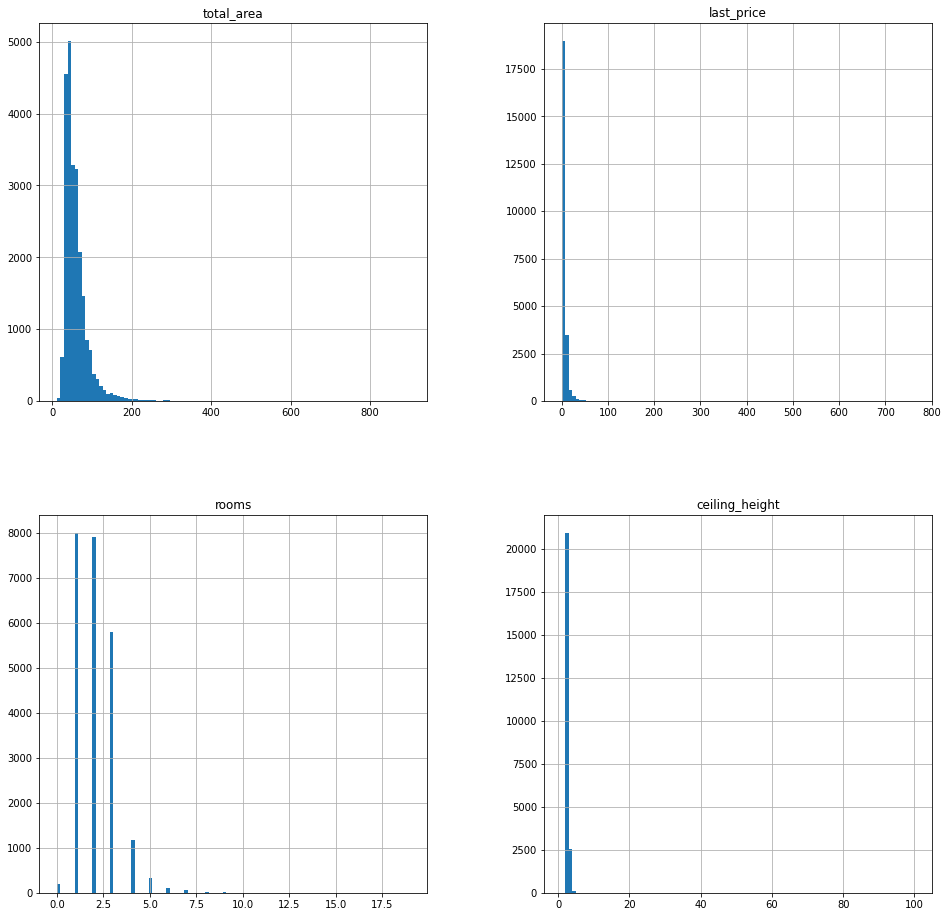

In [40]:
ax = data.hist(['total_area', 'last_price', 'rooms', 'ceiling_height'], bins=100, figsize=(16,16)); # plotting histograms on the selected columns


So, from the obtained histograms, we can draw the following conclusions:
1. Total area: most values are in the range of 50 - 70 square meters, however, the scale along the x-axis, along which the area is indicated, allows us to understand that the dataset contains both very small and very big values - over 800 sq.m.
2. Last price: in this feature the gap is huge, however, from the histogram we can see that most prices fluctuate in the range of 5 - 15 million dollars.
3. With the number of rooms, everything is much clearer, the histogram resembles a bar chart, since the gap in values is relatively small. At the same time, property with 1 - 3 rooms prevail in the offer on the market of St. Petersburg and its environs.
4. As for the ceiling height, the gap among values is also low, there are outliers - atypically high ceilings, but their share is quite small. Most ceilings are about 2 - 3 m high.


Next, let's check the days of exposition distribution . To do this, first we will plot a histogram, and then calculate the median and mean for the 'days_exposition' column:



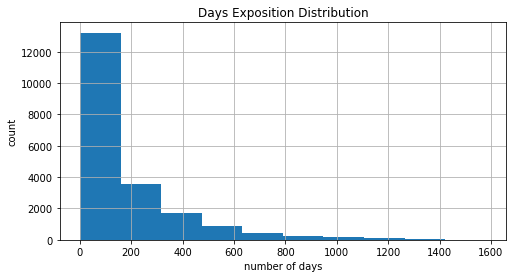

In [41]:
ax = data['days_exposition'].hist(figsize=(8,4)) # plotting histogram on the 'days_exposition' column
ax.set_title('Days Exposition Distribution')
ax.set_xlabel('number of days')
ax.set_ylabel('count');

In [42]:
data['days_exposition'].describe() # calling describe() to check out the mean&median

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

We have notcied that the mean is almost twice than the median, this is due to the presence of outliers among the observations. The histogram tells us that the majority of sales occur within 165 days, then their amount
drops sharply.



Let's try to improve the data quality. To do this, we will identify rare and outlier values. Let's do it graphically using box-plot:



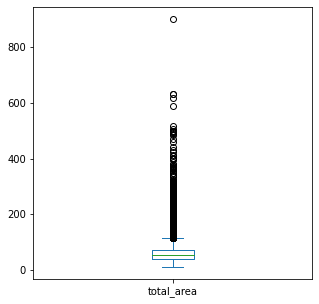

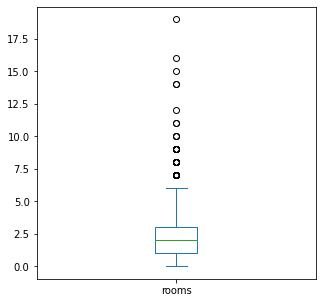

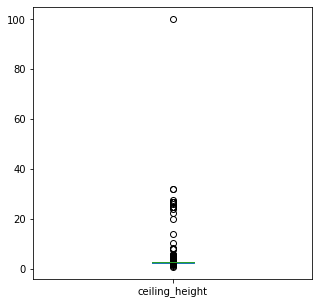

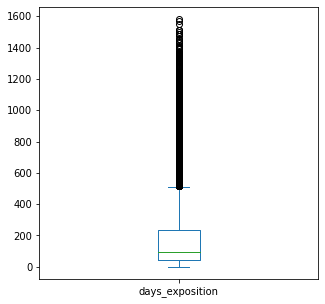

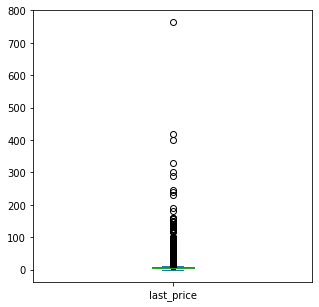

In [43]:
for col in ['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'last_price']: # iterating the selected columns
    data.plot(y=col, kind='box', figsize=(5, 5))  # plotting box-plot for each 

Let's optimize the dataset, excluding the so-called outliers from it. Their boundary can be seen in the box plot: this observations lie outside the IQR.


In [44]:
balanced_data = data.query('total_area <= 200 &  rooms <=6 & 1 <= ceiling_height <= 4 & days_exposition <= 480 & last_price <= 15') # creating a new df filtering off the outliers
balanced_data.head(20) # checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_share_%,kitchen_share_%,price_meter2,weekday,month,year,floor_category
1,7,3.35,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,0,3001.0,81,46.039604,27.227723,0.082921,1,12,2018,first
4,2,10.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,1,48.0,121,32.000000,41.000000,0.1,1,6,2018,other
5,10,2.89,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,...,0,3001.0,55,47.368421,29.934211,0.095066,0,9,2018,other
6,6,3.7,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,False,...,0,3001.0,155,28.418231,38.605898,0.099196,3,11,2017,other
8,20,2.9,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,...,0,3001.0,189,46.531966,26.568154,0.087455,2,5,2018,other
9,18,5.4,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,...,0,3001.0,289,71.475410,10.655738,0.088525,6,2,2017,other
10,5,5.05,39.60,2017-11-16T00:00:00,1,2.67,12,20.30,3,False,...,2,553.0,137,51.262626,21.464646,0.127525,3,11,2017,other
11,9,3.3,44.00,2018-08-27T00:00:00,2,2.65,5,31.00,4,False,...,0,3001.0,7,70.454545,13.636364,0.075,0,8,2018,other
12,10,3.89,54.00,2016-06-30T00:00:00,2,2.65,5,30.00,5,False,...,0,3001.0,90,55.555556,16.666667,0.072037,3,6,2016,last
13,20,3.55,42.80,2017-07-01T00:00:00,2,2.56,5,27.00,5,False,...,3,298.0,366,63.084112,12.149533,0.082944,5,7,2017,last


Next, we are proceeding to testing hypotheses on the dataset, for this we will check the relation of individual parameters and property prices. First of all, let's calculate the Pearson correlation coefficient for 'last_price' and 3 quantitative variables that hypothetically affect the price on real estate. In addition, we will plot a scatter diagram for each of them:


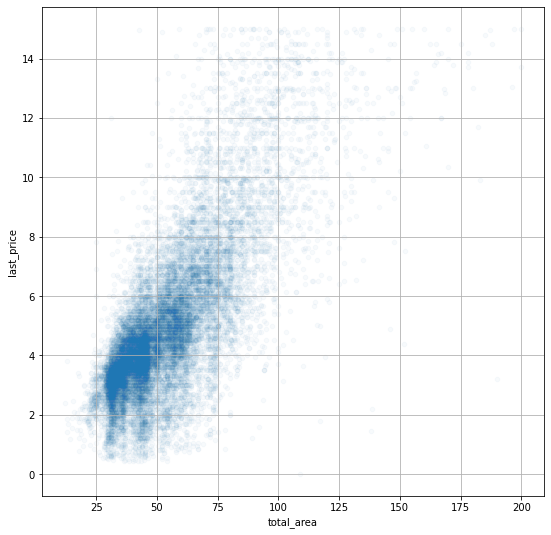

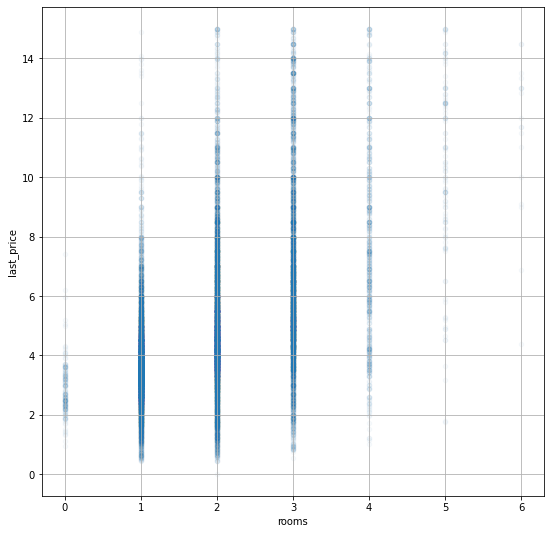

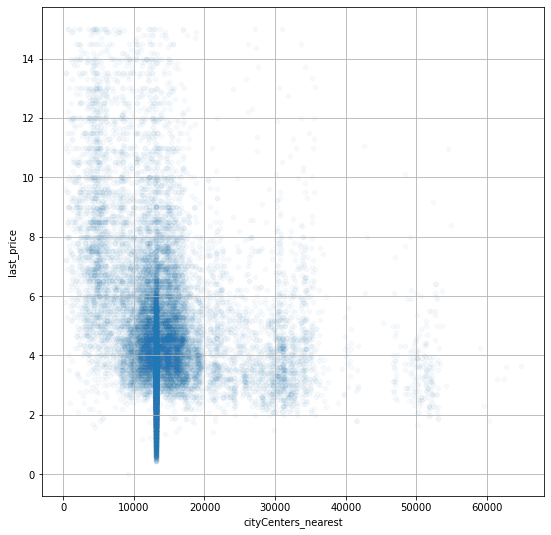

In [45]:
for metric in ['total_area', 'rooms', 'cityCenters_nearest']: # iterating the selected columns
    balanced_data.plot(x=metric, y='last_price', kind='scatter',alpha=0.03, grid=True, figsize=(9,9))  # plotting scatter plot for each
    
    

In [46]:
balanced_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr() # calculating correlation for the selected columns

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.746538,0.489775,-0.257074
total_area,0.746538,1.000000,0.802164,-0.138422
rooms,0.489775,0.802164,1.000000,-0.094314
cityCenters_nearest,-0.257074,-0.138422,-0.094314,1.000000


So, based on the values of the Pearson coefficient and on the plots, we can notice the following:
- **there is a relation between the property total area and the price on it**, and this relation is positive, and also quite strong (approx. 0.7): this means that in 70% of cases, with an increase in the property area, its price also increases.
- the correlation between the price and the number of rooms is low positive (approx. 0.4), we cannot define such a relation as linear. At the same time, the variable itself is located at the intersection of quantity and category. From the scatterplot, we can see that as the number of rooms increases, the lowest price for each group increases, however, most of the 1-, 2- and 3-room apartments are in the same price range. Thus, we cannot say that **the property price directly depends on the number of rooms**.
- the correlation between the property price and the distance from the center is also quite modetate, but negative (approx. -0.3). Generally speaking, the inverse relation was quite predictable, but its strength is more of a surprise. However, it should be assumed that **distance from the center directly affects the property price.**



Regarding the remaining variables, which are categorical variables, due to their nature, it is impossible to calculate the correlation coefficient, so it makes sense for them to display summary tables or plot bar-plots.



Let's start with the influence of weekday on the property price. To do this, we will build a pivot table, where as indexes we will use the weekdays from Monday to Sunday (from 0 to 6), and as values, the most reliable median price value calculated on the balanced data:



In [47]:
weekday_pivot = balanced_data.pivot_table(index='weekday', values='last_price', aggfunc='median') #  creating a summary pivot table 
weekday_pivot.head(7) # checking the result

,last_price
weekday,
0,4.365
1,4.4
2,4.4
3,4.4
4,4.35
5,4.4
6,4.29


The difference by weekday is in hundredths. This allows us to state that **the price on real estate in St. Petersburg and its environs does not depend on the weekday the ad was published**.

Next, let's check if the price depends on the month and year the ad was published:


In [48]:
month__pivot = balanced_data.pivot_table(index='month', values='last_price', aggfunc='median') #  creating a summary pivot table  
month__pivot.head(12)  # checking the result

,last_price
month,
1,4.4
2,4.4
3,4.3
4,4.4425
5,4.35
6,4.2
7,4.35
8,4.4
9,4.5


In [49]:
year__pivot = balanced_data.pivot_table(index='year', values='last_price', aggfunc='median') #  creating a summary pivot table 
year__pivot.head()  # checking the result


,last_price
year,
2015,4.53
2016,4.3
2017,4.3
2018,4.399
2019,4.7


In the last two columns the difference is already up to decimals, however, in this case the difference is relatively small. All of the above allows us to state that **there is no relation between the month, year of ad publication and the price on real estate**.



Let's assess the relation between the prices on real estate and the categorical variable "floor":



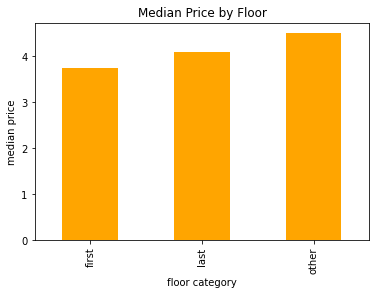

In [50]:
ax = balanced_data.groupby('floor_category')['last_price'].median().plot.bar(x='floor_category', y='last_price', color = 'orange')  # plotting a bar-plot
ax.set_title('Median Price by Floor')
ax.set_xlabel('floor category')
ax.set_ylabel('median price');

Some difference is noticeable. Based on this dataframe, we can state that the apartments on the first and last floors are priced lower than on all the others, therefore, **the prices on real estate depend on the floor**.



Next, based on the available balanced data, we will display a pivot table, where the 'city' will be used as indexes, and as values - the amount of ads and the average price per square meter in each of them:



In [51]:
locality_name_pivot = balanced_data.pivot_table(index='locality_name', values='price_meter2', aggfunc=['count', 'mean']).reset_index()  # creating a pivot table groupying by 'locality_name'
locality_name_pivot.columns = ['locality_name', 'offer_number', 'avg_price']  # renaming columns
locality_name_pivot = locality_name_pivot.sort_values(by=['offer_number']) # sorting the dataframe in ascending order
display(locality_name_pivot.head(10)) # displaying top 10 with the smallest number of offers
locality_name_pivot.tail(10)  # displaying top 10 with the greatest number of offers

,locality_name,offer_number,avg_price
276,садоводческое некоммерческое товарищество Лесн...,1,0.022581
234,Сумино,1,0.030387
57,Дружноселье,1,0.041379
193,Реброво,1,0.039238
237,Счастье,1,0.064583
52,Гончарово,1,0.041371
51,Глинка,1,0.046602
191,Рапполово,1,0.07
107,Куровицы,1,0.022593
48,Гладкое,1,0.030769


,locality_name,offer_number,avg_price
40,Выборг,190,0.056882
47,Гатчина,242,0.068105
186,Пушкин,267,0.100029
157,Парголово,284,0.089196
91,Колпино,290,0.074617
39,Всеволожск,304,0.066728
267,Шушары,384,0.077792
103,Кудрово,400,0.094442
137,Мурино,507,0.085903
204,Санкт-Петербург,11609,0.10577


As we can see from the dataframe, the absolute leaders are St. Petersburg, other big  cities, for example, Vyborg,
as well as suburbs: Gatchina, Pushkin. There are less ads in rather little known and, for sure, not very close to the center towns.



The hypotheses have been tested on the entire balanced data. Next, let's try to check them on the segment - the center of St. Petersburg.
To do this, first of all, we will select ads for St. Petersburg in a separate dataframe:


In [52]:
spb_data = balanced_data.loc[data['locality_name'] == 'Санкт-Петербург'] # creating a new dataframe with the rows compliant with the condition
spb_data['km_to_centre'] = (spb_data.loc[:, 'cityCenters_nearest'] / 1000).apply(round) # adding a column with the distance rounded to intire kms
spb_data[['locality_name', 'cityCenters_nearest', 'km_to_centre', 'last_price', 'price_meter2']].head(10)  # checking the result

,locality_name,cityCenters_nearest,km_to_centre,last_price,price_meter2
4,Санкт-Петербург,8098,8,10.0,0.1
9,Санкт-Петербург,15008,15,5.4,0.088525
10,Санкт-Петербург,13878,14,5.05,0.127525
15,Санкт-Петербург,14259,14,4.65,0.119231
16,Санкт-Петербург,10698,11,6.7,0.081707
18,Санкт-Петербург,10842,11,3.25,0.104839
19,Санкт-Петербург,12843,13,14.2,0.117355
21,Санкт-Петербург,9722,10,3.2,0.101266
24,Санкт-Петербург,2336,2,6.5,0.066872
25,Санкт-Петербург,14640,15,6.8,0.089474


Next, we will display a summary table, where the distance from the center in km will be indicated as indexes, and as values, the average price per 1 sq. km:



In [53]:
km_pivot =  spb_data.pivot_table(index='km_to_centre', values='price_meter2').reset_index()  # creating a pivot table groupying by 'km_to_centre'
km_pivot.head(30)  # checking the resukt

,km_to_centre,price_meter2
0,0,0.116698
1,1,0.124214
2,2,0.119649
3,3,0.108407
4,4,0.116935
5,5,0.121671
6,6,0.123811
7,7,0.118001
8,8,0.116593
9,9,0.107679


Thus, we have calculated the average price per kilometer for each distance from the center. Let's plot a scatterplot according to these data:



<AxesSubplot:xlabel='km_to_centre', ylabel='price_meter2'>

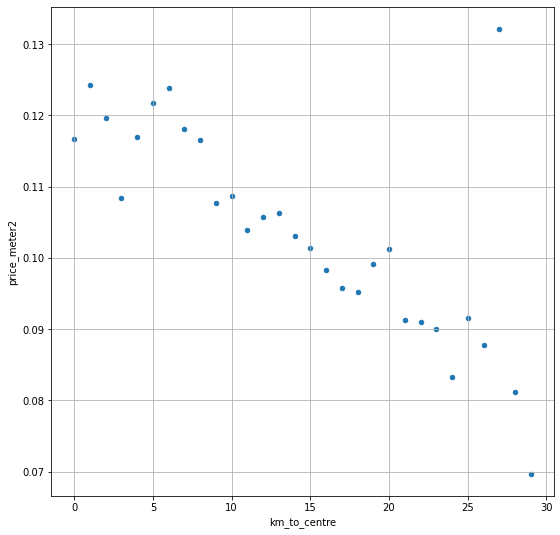

In [54]:
km_pivot.plot(x='km_to_centre', y='price_meter2', kind='scatter', grid=True, figsize=(9,9))  # plotting the scatter plot

The scatter shows a downward trend in the price per 1 sq. m. moving away from the center in St. Petersburg, i.e. the relation is inverse. As for the central zone, this is where the scatterplot changes a lot. Such
the change is most noticeable in the interval from 0 to 8 km.
Thus, the center area in St. Petersburg is the one that lies within a radius of 8 km inclusive.
Let's separate it into a separate dataframe.



In [55]:
spb_data_8 = spb_data.query('km_to_centre <=8')  # creating a new dataframe including only thw data compliant with the condition
spb_data_8.head(10)  # checking the result


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_share_%,kitchen_share_%,price_meter2,weekday,month,year,floor_category,km_to_centre
4,2,10.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,48.0,121,32.000000,41.000000,0.1,1,6,2018,other,8
24,8,6.5,97.2,2015-10-31T00:00:00,2,2.65,3,46.50,1,False,...,124.0,265,47.839506,20.164609,0.066872,5,10,2015,first,2
70,9,3.4,30.0,2018-09-05T00:00:00,1,2.65,5,16.00,1,False,...,3001.0,14,53.333333,23.333333,0.113333,2,9,2018,first,8
94,3,3.5,29.5,2019-04-26T00:00:00,1,2.50,5,15.60,2,False,...,3001.0,4,52.881356,18.644068,0.118644,4,4,2019,other,7
99,32,9.6,90.0,2017-09-26T00:00:00,4,2.65,5,67.00,2,False,...,3001.0,104,74.444444,8.888889,0.106667,1,9,2017,other,3
106,9,10.5,124.1,2017-05-25T00:00:00,5,3.20,4,79.40,3,False,...,3001.0,6,63.980661,16.116035,0.084609,3,5,2017,other,6
111,4,4.59,40.0,2017-05-29T00:00:00,1,2.65,6,18.00,1,False,...,3001.0,31,45.000000,25.000000,0.11475,0,5,2017,first,6
136,16,6.5,51.8,2018-08-01T00:00:00,2,3.45,6,25.60,2,False,...,812.0,163,49.420849,14.092664,0.125483,2,8,2018,other,4
137,11,13.3108,85.1,2018-01-01T00:00:00,2,2.70,10,31.52,5,False,...,133.0,340,37.038778,31.551116,0.156414,0,1,2018,other,4
138,8,4.8,40.0,2017-11-18T00:00:00,2,2.65,3,29.00,2,False,...,729.0,80,72.500000,15.000000,0.12,5,11,2017,other,3


Next, we check whether the previously tested hypotheses are confirmed on this data segment.

First, let's look at the distribution of the already known parameters 'total_area', 'last_price', 'rooms', 'ceiling_height' in the central segment:



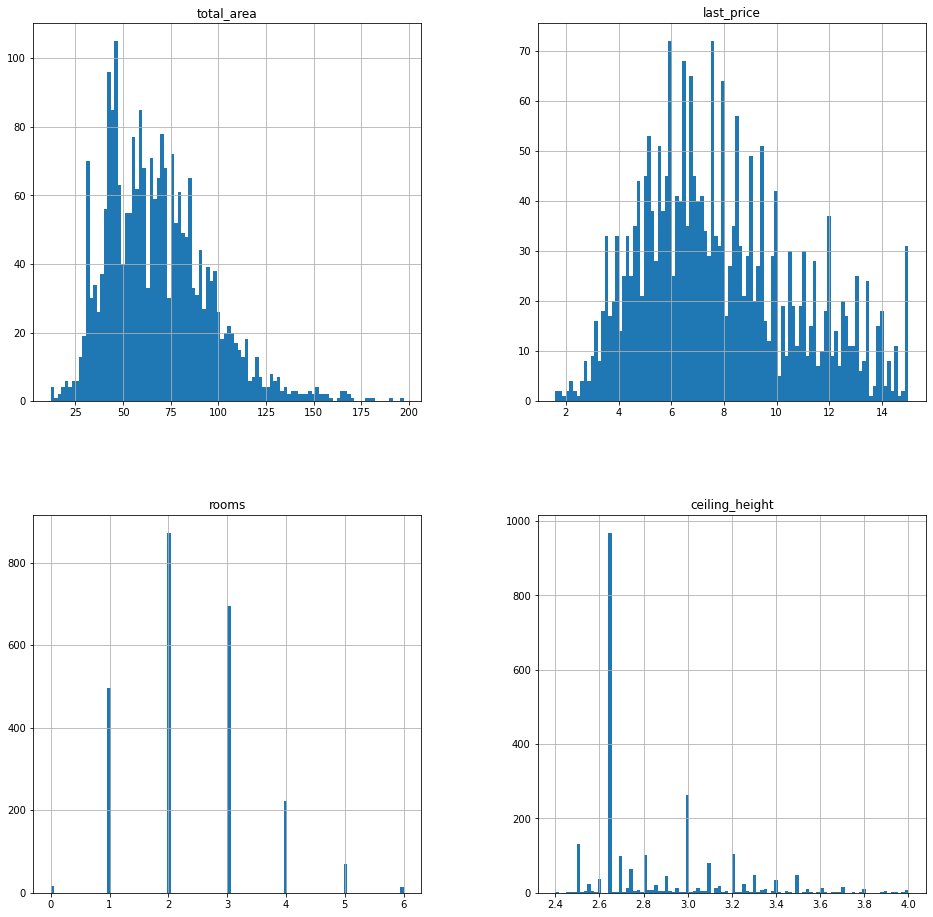

In [56]:
spb_data_8.hist(['total_area', 'last_price', 'rooms', 'ceiling_height'], bins=100, figsize=(16,16)); # plotting histograms on the selected columns

Since the data for the center of St. Petersburg is a sample from the balanced ones, all outliers are excluded, in addition, the number of observations has decreased significantly, so the histograms are more detailed.
Most of all in the center there are small apartments with the area of approx. 45 sq. m. Concerning the price, the ones of 5-8 million prevail. As for the number of rooms and the height of the ceilings, the most frequent values coincide with the general dataset.

Next, we will check the correlation betwen price on real estate in the center and the parameters that we studied on the general dataset.



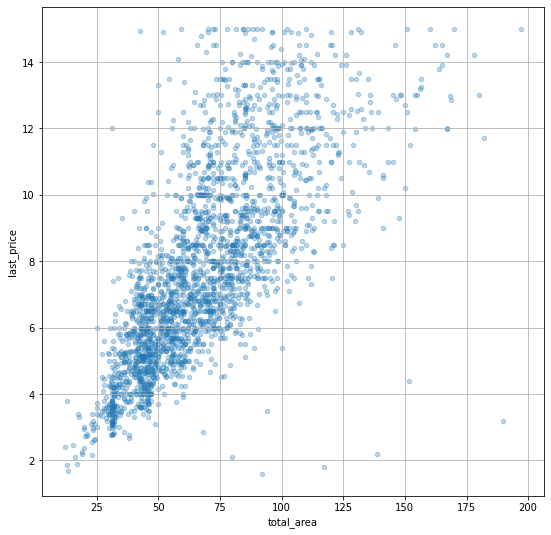

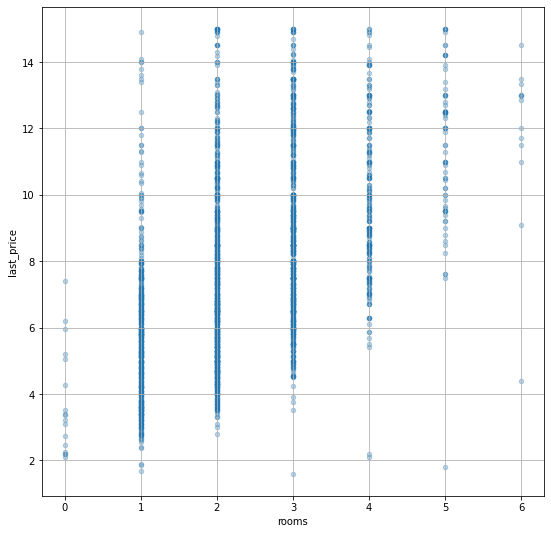

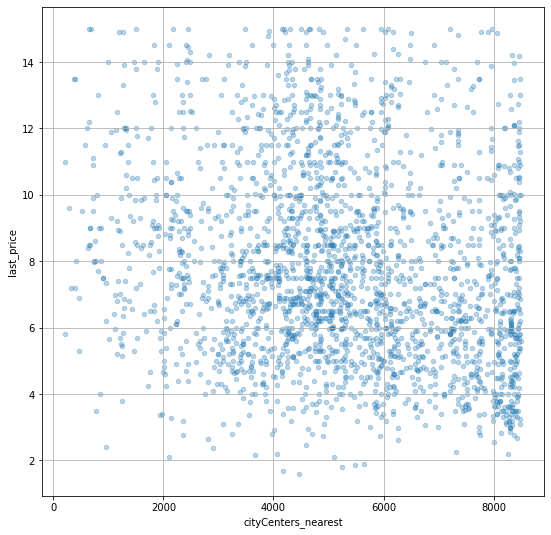

In [57]:
for item in ['total_area', 'rooms', 'cityCenters_nearest']: # iterating the selected columns
    spb_data_8.plot(x=item, y='last_price', kind='scatter',alpha=0.3, grid=True, figsize=(9,9))  # plotting a scatter plot for each
   
    


    

In [58]:
spb_data_8[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()  # calculating correlation among the selected columns

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.723765,0.503549,-0.193113
total_area,0.723765,1.000000,0.813712,-0.237847
rooms,0.503549,0.813712,1.000000,-0.221616
cityCenters_nearest,-0.193113,-0.237847,-0.221616,1.000000


So, for each of the quantitative features, the same trends are observed as in the main dataset.
The correlation coefficient of price and total area is almost the same. As for the distance from the center and the price, the relation is even weaker, and this is quite logical: the central zone was chosen based on the dependence of the cost per square meter. mvoing away from the center. The correlation between the price and the number of rooms in the center of St. Petersburg turned out to be relatively low.

Next, let's check the categorical features:



In [59]:
weekday_pivot_spb_8 = spb_data_8.pivot_table(index='weekday', values='last_price')  # creating a pivot table
weekday_pivot_spb_8.head(7)  # checking the result

,last_price
weekday,
0,7.98093
1,7.823141
2,7.746485
3,7.728069
4,7.758192
5,7.823194
6,8.080206


In [60]:
month_pivot_spb_8 = spb_data_8.pivot_table(index='month', values='last_price')   # creating a pivot table
month_pivot_spb_8.head(12)  # checking the result

,last_price
month,
1,7.834462
2,7.909619
3,7.975404
4,7.602823
5,7.877117
6,7.650115
7,7.867121
8,7.71436
9,8.247236


In [61]:
year_pivot_spb_8 = spb_data_8.pivot_table(index='year', values='last_price')   # creating a pivot table
year_pivot_spb_8.head()  # checking the result

,last_price
year,
2015,7.872161
2016,7.970562
2017,7.887503
2018,7.736844
2019,7.404218


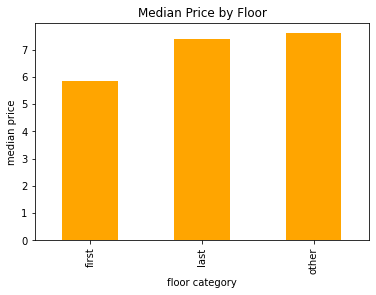

In [62]:
ax = spb_data_8.groupby('floor_category')['last_price'].median().plot.bar(x='floor_category', y='last_price', color = 'orange')  # plotting a bar plot
ax.set_title('Median Price by Floor')
ax.set_xlabel('floor category')
ax.set_ylabel('median price');


First of all, we can see that the average price of real estate in the center is significantly higher than the average price of the entire dataset.
For all catetogy indiators, the difference between groups is slightly higher than in the entire dataset, however, the difference between one group and another consists of decimals either.


**Conclusions**

After analyzing the data from the entire dataset and the data segment related to the center of St. Petersburg, we made sure that the same trends can be traced in them.

**The results of the research analysis allow us to state that the total area, distance from the center, floor category affect the price on real estate, while the dependence from the number of rooms, weekday, month and year of publication of the announcement is insignificant.**



## Study Results
We tested five hypotheses and found out that:

1. The total area affects the price on real estate.
The first hypothesis has been confirmed.
2. The number of rooms does not affect the price on real estate.
The second hypothesis has not been confirmed.
3. The floor category affects the price on real estate.
The third hypothesis has been confirmed.
4. The date of ad placement does not affect the price on real estate.
The fourth hypothesis has not been confirmed.
5. The distance from the center affects the price on real estate.
The fifth hypothesis has been confirmed.

Thus, some hypotheses have been confirmed, and some have not. However, we tested the metrics for Pearson's correlation, that is, a linear relation. We can not exclude there is another kind of relation between the price and the features for which the hypotheses have not been confirmed.
